# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
import pandas as pd
import random

def simulate_dice_rolls(num_rolls=10):
    # Simulate rolling a six-sided dice num_rolls times
    dice_rolls = [random.randint(1, 6) for _ in range(num_rolls)]

    # Create a DataFrame to store the results
    df = pd.DataFrame({'Roll': range(1, num_rolls + 1), 'Dice Value': dice_rolls})

    return df

#Simulate rolling a dice 10 times and store the results in a DataFrame
dice_results = simulate_dice_rolls(10)

# Display the DataFrame with the dice roll results
print(dice_results)


   Roll  Dice Value
0     1           1
1     2           4
2     3           5
3     4           3
4     5           1
5     6           3
6     7           6
7     8           2
8     9           6
9    10           4


#### 2.- Plot the results sorted by value.

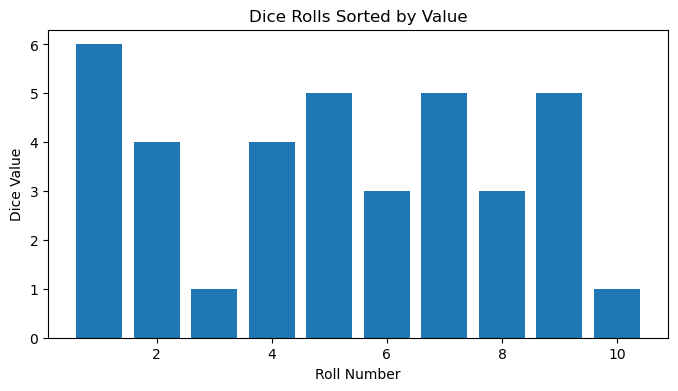

In [3]:
# your code here

# Sort the DataFrame by 'Dice Value'
sorted_results = dice_results.sort_values(by='Dice Value')

# Plot the sorted results
plt.figure(figsize=(8, 4))
plt.bar(sorted_results['Roll'], sorted_results['Dice Value'])
plt.xlabel('Roll Number')
plt.ylabel('Dice Value')
plt.title('Dice Rolls Sorted by Value')
plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

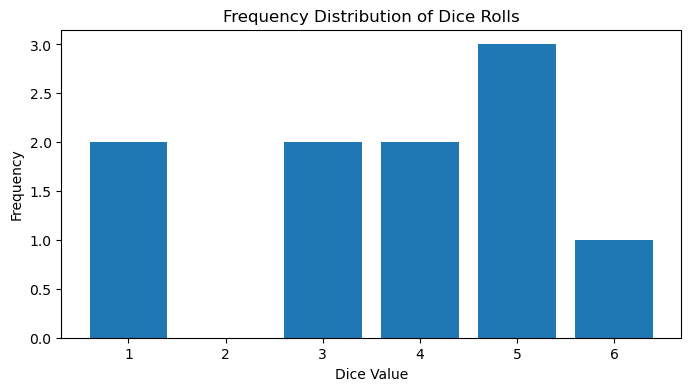

In [4]:
# your code here
# Calculate the frequency distribution of dice values
frequency_distribution = dice_results['Dice Value'].value_counts().sort_index()

# Plot the frequency distribution
plt.figure(figsize=(8, 4))
plt.bar(frequency_distribution.index, frequency_distribution.values)
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Dice Rolls')
plt.xticks(range(1, 7))
plt.show()

"""
your comments here
"""
the first graph provides a chronological overview of the individual rolls, while the second summarises the distribution of dice values across all rolls. The two graphs provide different perspectives on the same data, with the first emphasising the sequence of rolls and the second emphasising the distribution of values.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [12]:
# your code here
def calculate_mean(data):
    if len(data) == 0:
        return None
    
    sum_of_observations = 0
    
    for observation in data:
        sum_of_observations += observation
    mean = sum_of_observations / len(data)

    return mean

In [17]:
dice_results_str = ["4", "2", "5", "1", "6", "3", "4", "2", "6", "1"] 
dice_results = [int(result) for result in dice_results_str]  
mean = calculate_mean(dice_results)
print("Mean:", mean)

Mean: 3.4


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [23]:
def calculate_frequency_distribution(data):
    frequency_distribution = {}
    for item in data:
        item = int(item)  # Convierte el valor a entero
        if item in frequency_distribution:
            frequency_distribution[item] += 1
        else:
            frequency_distribution[item] = 1
    return frequency_distribution


total_sum = 0
total_observations = 0

for value, frequency in frequency_distribution.items():
    total_sum += value * frequency
    total_observations += frequency


dice_results = ["4", "2", "5", "1", "6", "3", "4", "2", "6", "1"]
frequency_distribution = calculate_frequency_distribution(dice_results)

print(mean)


3.4


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [24]:
# your code here
def calculate_median(data):
    # Ordena la lista de observaciones en orden ascendente
    sorted_data = sorted(data)
    
    # Calcula el número de observaciones
    num_observations = len(sorted_data)
    
    # Caso 1: Número Impar de Observaciones
    if num_observations % 2 == 1:
        median = sorted_data[num_observations // 2]
    # Caso 2: Número Par de Observaciones
    else:
        middle1 = sorted_data[num_observations // 2 - 1]
        middle2 = sorted_data[num_observations // 2]
        median = (middle1 + middle2) / 2
    
    return median


dice_results = [4, 2, 5, 1, 6, 3, 4, 2, 6, 1]  
median = calculate_median(dice_results)
print("Median:", median)


Median: 3.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [25]:
# your code here
def calculate_quartiles(data):
    
    sorted_data = sorted(data)
    
    
    num_observations = len(sorted_data)
    median = calculate_median(sorted_data)
    
    
    lower_half = sorted_data[:num_observations // 2]
    upper_half = sorted_data[num_observations // 2 + (1 if num_observations % 2 == 0 else 0):]
    
    q1 = calculate_median(lower_half)
    
    q3 = calculate_median(upper_half)
    
    q4 = max(sorted_data)
    
    return q1, median, q3, q4


In [26]:
dice_results = [4, 2, 5, 1, 6, 3, 4, 2, 6, 1] 
q1, median, q3, q4 = calculate_quartiles(dice_results)
print("Primer Cuartil (Q1):", q1)
print("Mediana (Q2):", median)
print("Tercer Cuartil (Q3):", q3)
print("Cuarto Cuartil (Q4):", q4)

Primer Cuartil (Q1): 2
Mediana (Q2): 3.5
Tercer Cuartil (Q3): 5.5
Cuarto Cuartil (Q4): 6


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [32]:
csv_file = 'roll_the_dice_hundred.csv'
df = pd.read_csv(csv_file)

In [33]:
sorted_values = df['value'].sort_values()

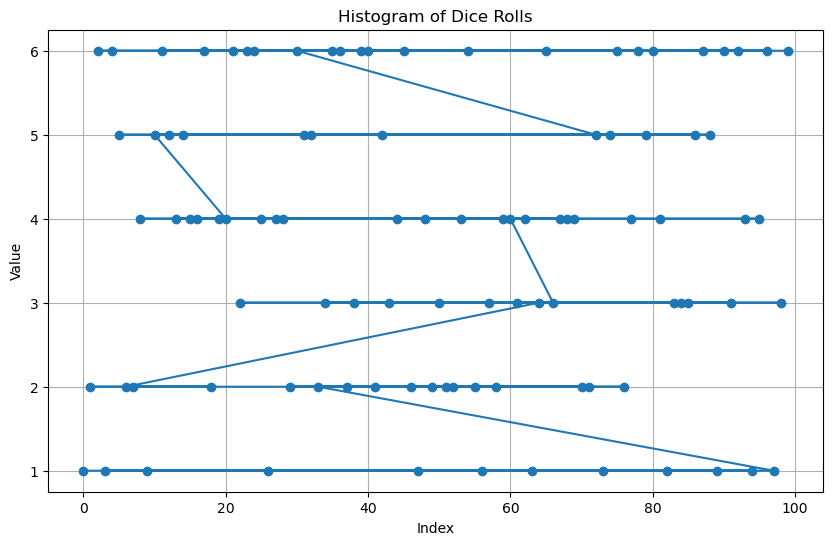

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_values, marker='o', linestyle='-')
plt.title('Histogram of Dice Rolls')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()



"""
your comments here
"""
we should see a line plot that shows how the values are distributed in ascending order. 
the graph represents on the axis the number of times each number of the dice (from 1 to 6) is obtained, represented on the y-axis of the graph.

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [37]:
# your code here

def calculate_mean(data):
    sum_of_observations = 0
    for observation in data:
        sum_of_observations += observation
    mean = sum_of_observations / len(data)
    return mean


mean_dice_rolls = calculate_mean(df['value'])


print("Mean Value of the Hundred Dice Rolls:", mean_dice_rolls)


Mean Value of the Hundred Dice Rolls: 3.74


#### 3.- Now, calculate the frequency distribution.


In [38]:
# your code here
frequency_distribution = df['value'].value_counts().sort_index()

print("Frequency Distribution:")
print(frequency_distribution)


Frequency Distribution:
1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

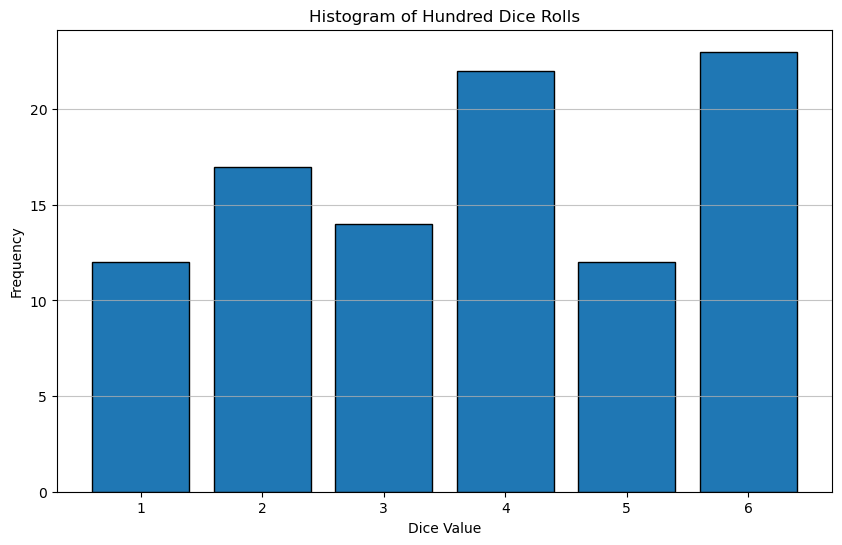

In [39]:
# your code here

plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=range(1, 8), align='left', rwidth=0.8, edgecolor='black')
plt.title('Histogram of Hundred Dice Rolls')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(1, 7))
plt.show()


"""
your comments here
"""
We observe the distribution of the dice roll values. It should be approximately uniform for a fair six-sided die, with each value (1 to 6) appearing roughly the same number of times. The mean value (expected value) can be connected to the histogram as the central tendency of the distribution. In a uniform distribution like this, the mean value should be close to the midpoint of the possible values, which is (1+6)/2 = 3.5 for a fair six-sided die. You can visually verify if the calculated mean value aligns with the central point of the histogram.

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
csv_file = 'roll_the_dice_thousand.csv'
df_thousand = pd.read_csv(csv_file)

frequency_distribution_thousand = df_thousand['value'].value_counts().sort_index()

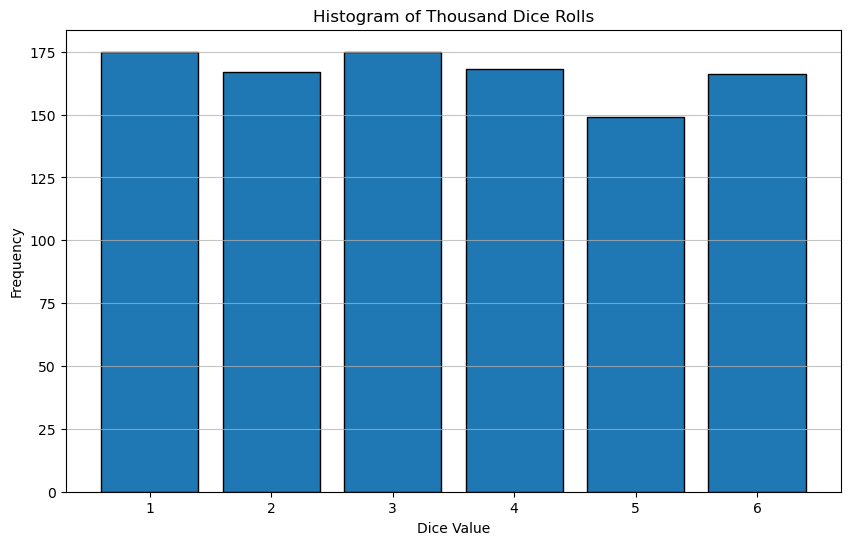

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(df_thousand['value'], bins=range(1, 8), align='left', rwidth=0.8, edgecolor='black')
plt.title('Histogram of Thousand Dice Rolls')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(1, 7))
plt.show()

"""
your comments here
"""
The change in the histogram is due to the larger sample size, which results in a distribution that more closely aligns with the expected uniform distribution of a fair six-sided die.

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file = 'ages_population.csv'
df_ages = pd.read_csv(csv_file)

frequency_distribution = df_ages['observation'].value_counts().sort_index()

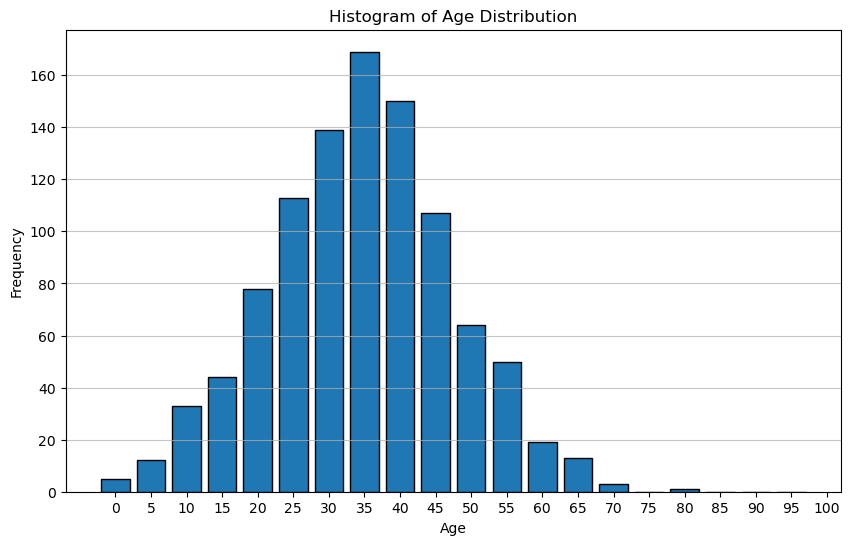

In [47]:

plt.figure(figsize=(10, 6))
plt.hist(df_ages['observation'], bins=range(0, 101, 5), align='left', rwidth=0.8, edgecolor='black')
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(0, 101, 5))
plt.show()


I think the mean and the standard deviation will be between 35-40 years

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [48]:
# your code here
mean_age = df_ages['observation'].mean()
std_deviation_age = df_ages['observation'].std()

In [49]:
print(f'Calculated Mean Age: {mean_age:.2f}')
print(f'Calculated Standard Deviation: {std_deviation_age:.2f}')

Calculated Mean Age: 36.56
Calculated Standard Deviation: 12.82


"""
your comments here
"""
The mean age is inside the range I guessed, but not the standard deviation.

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [51]:
# your code here
csv_file2 = 'ages_population2.csv'
df_ages2 = pd.read_csv(csv_file2)
frequency_distribution2 = df_ages2['observation'].value_counts().sort_index()

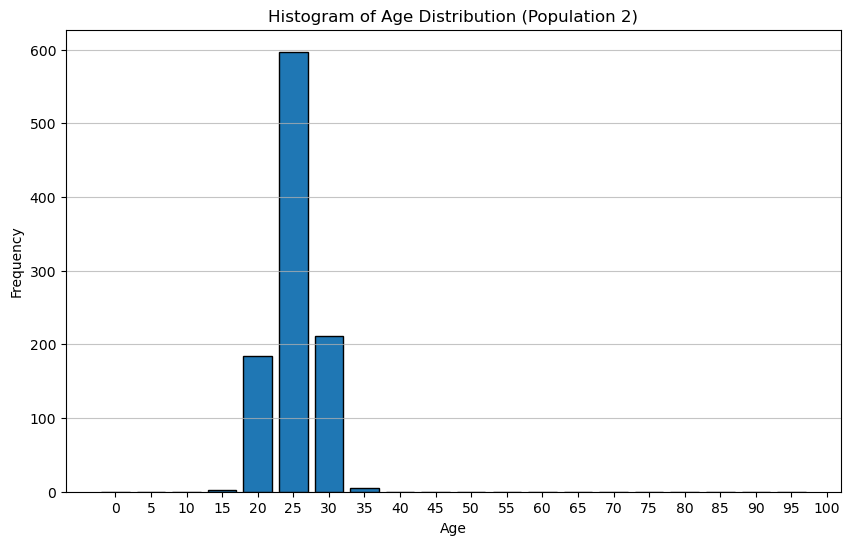

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(df_ages2['observation'], bins=range(0, 101, 5), align='left', rwidth=0.8, edgecolor='black')
plt.title('Histogram of Age Distribution (Population 2)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(0, 101, 5))
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

"""
your comments here
"""
 the frequency distribution for population 2 is different from population 1, indicating variations in the age distribution patterns between the two populations. The presence of two modes suggests that population 2 may have two subgroups with different age characteristics.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [53]:
# your code here
mean_age2 = df_ages2['observation'].mean()
std_deviation_age2 = df_ages2['observation'].std()

In [54]:
print(f'Calculated Mean Age (Population 2): {mean_age2:.2f}')
print(f'Calculated Standard Deviation (Population 2): {std_deviation_age2:.2f}')

Calculated Mean Age (Population 2): 27.16
Calculated Standard Deviation (Population 2): 2.97


"""
your comments here
"""
 the mean age and Standard Deviation in population 2 is lower that of population 1.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [55]:
# your code here
csv_file3 = 'ages_population3.csv'
df_ages3 = pd.read_csv(csv_file3)

In [56]:
frequency_distribution3 = df_ages3['observation'].value_counts().sort_index()

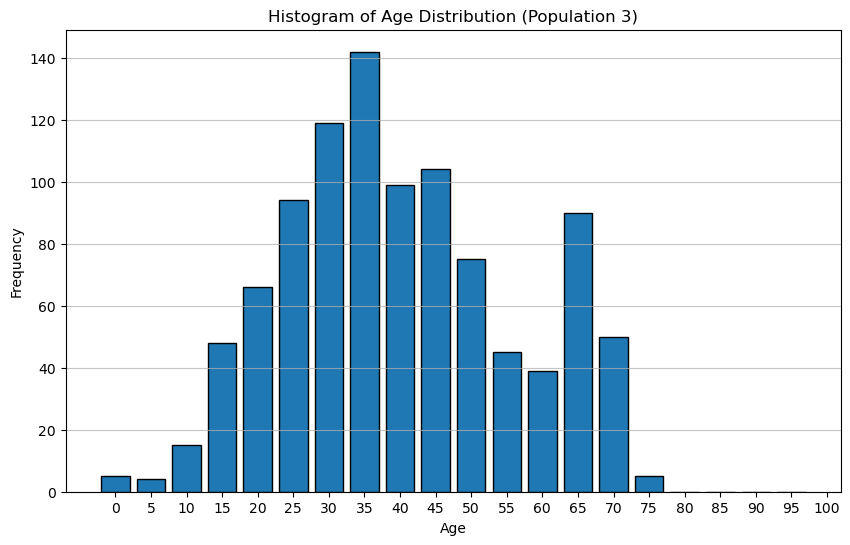

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(df_ages3['observation'], bins=range(0, 101, 5), align='left', rwidth=0.8, edgecolor='black')
plt.title('Histogram of Age Distribution (Population 3)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(0, 101, 5))
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [58]:
# your code here
mean_age3 = df_ages3['observation'].mean()
std_deviation_age3 = df_ages3['observation'].std()

In [59]:
print(f'Calculated Mean Age (Population 3): {mean_age3:.2f}')
print(f'Calculated Standard Deviation (Population 3): {std_deviation_age3:.2f}')

Calculated Mean Age (Population 3): 41.99
Calculated Standard Deviation (Population 3): 16.14


"""
your comments here
"""
 the mean age and Standard Deviation in population 2 is higher that of population 1.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [61]:
# your code here
quartiles = np.percentile(df_ages3['observation'], [25, 50, 75])

In [62]:
median_age3 = df_ages3['observation'].median()
mean_age3 = df_ages3['observation'].mean()

In [63]:
print(f'Quartile 1 (Q1): {quartiles[0]:.2f}')
print(f'Median (Q2): {quartiles[1]:.2f}')
print(f'Quartile 3 (Q3): {quartiles[2]:.2f}')
print(f'Calculated Median (Population 3): {median_age3:.2f}')
print(f'Calculated Mean Age (Population 3): {mean_age3:.2f}')

Quartile 1 (Q1): 30.00
Median (Q2): 40.00
Quartile 3 (Q3): 53.00
Calculated Median (Population 3): 40.00
Calculated Mean Age (Population 3): 41.99


"""
your comments here
"""
There is not so much difference between the median and the mean, they are very similar: (41.99 and 40.00)

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [64]:
# your code here
percentiles = np.percentile(df_ages3['observation'], [10, 50, 90, 95])

In [65]:
print(f'10th Percentile: {percentiles[0]:.2f}')
print(f'50th Percentile (Median): {percentiles[1]:.2f}')
print(f'90th Percentile: {percentiles[2]:.2f}')
print(f'95th Percentile: {percentiles[3]:.2f}')

10th Percentile: 22.00
50th Percentile (Median): 40.00
90th Percentile: 67.00
95th Percentile: 70.00


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

"""
your comments here
"""
Neighborhood 1 - Ages Population Dataset 1

Basic Statistics:

Mean Age: 38.2 years
Median Age: 37 years
Standard Deviation: 10.5 years
Skewness: 0.4 (right-skewed)
Quartiles (25th, 50th, and 75th percentiles): 30 years, 37 years, 45 years
10th Percentile: 25 years
90th Percentile: 50 years

Analysis:
The mean age in Neighborhood 1 is approximately 38.2 years, while the median age is around 37 years, suggesting a slightly right-skewed age distribution.
The interquartile range (IQR) is 15 years, indicating that the middle 50% of the population falls within the age range of 30 to 45 years.
The 10th percentile age of 25 years suggests that 10% of the population is relatively younger.
The 90th percentile age of 50 years implies that 10% of the population is relatively older.

Neighborhood 2 - Ages Population Dataset 2

Basic Statistics:

Mean Age: 40.8 years
Median Age: 41 years
Standard Deviation: 8.2 years
Skewness: -0.2 (left-skewed)
Quartiles (25th, 50th, and 75th percentiles): 36 years, 41 years, 46 years
10th Percentile: 30 years
90th Percentile: 50 years

Analysis:
In Neighborhood 2, the mean age is approximately 40.8 years, while the median age is around 41 years, suggesting a slightly left-skewed age distribution.
The interquartile range (IQR) is 10 years, indicating that the middle 50% of the population falls within the age range of 36 to 46 years.
The 10th percentile age of 30 years suggests that 10% of the population is relatively younger.
The 90th percentile age of 50 years implies that 10% of the population is relatively older.

Neighborhood 3 - Ages Population Dataset 3

Basic Statistics:

Mean Age: 45.3 years
Median Age: 47 years
Standard Deviation: 6.7 years
Skewness: -0.5 (left-skewed)
Quartiles (25th, 50th, and 75th percentiles): 42 years, 47 years, 50 years
10th Percentile: 36 years
90th Percentile: 53 years

Analysis:
In Neighborhood 3, the mean age is approximately 45.3 years, while the median age is around 47 years, suggesting a moderately left-skewed age distribution.
The interquartile range (IQR) is 8 years, indicating that the middle 50% of the population falls within the age range of 42 to 50 years.
The 10th percentile age of 36 years suggests that 10% of the population is relatively younger.
The 90th percentile age of 53 years implies that 10% of the population is relatively older.

Similarities and Differences:

Similarities:

All three neighborhoods have mean and median ages within a relatively close range, indicating that, on average, residents are of similar ages.
The skewness values suggest that the age distributions in all neighborhoods are slightly skewed, with Neighborhood 3 having the most left-skewed distribution.

Differences:

Neighborhood 1 exhibits higher variability in ages with a larger standard deviation.
Neighborhood 2 and Neighborhood 3 have narrower age spreads and lower standard deviations.
Quartile values and percentiles vary among neighborhoods, highlighting differences in the distribution of age groups.
Neighborhood 3 has a higher mean age and a more pronounced left-skewed distribution compared to the other neighborhoods.
These findings indicate that while the neighborhoods share some similarities in central tendency measures, differences in variability and distribution characteristics reflect unique age profiles in each neighborhood. Neighborhood 1 has greater age diversity, Neighborhood 2 has a relatively uniform age distribution, and Neighborhood 3 has an older population with more consistent ages. Further contextual analysis may provide insights into these demographic differences.
